<a href="https://colab.research.google.com/github/AyusheGangal/AGrow-ML/blob/main/mental_health_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mental Health in Tech Prediction 

In [1]:
# Importing essential libraries
import array
import numpy as np
import json
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set_palette('Set2')

In [3]:
# Mounting drive to import data saved in the drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

Mounted at /content/drive


In [4]:
# Creating dataframes to store the data files
df = pd.read_csv("drive/My Drive/Mental_Health_data/mental-health-in-tech-2016.csv")

In [5]:
df.shape

(1433, 63)

In [6]:
df.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [8]:
# new column names
renamed_columns = ['self_employed', 'number_of_employees', 'company_in_tech', 'role_in_tech', 'company_mental_health',
                  'company_mental_health_options_awareness', 'company_mental_health_discussion', 'company_mental_health_resources', 
                   'company_mental_health_anonymity','company_mental_health_leave', 'company_mental_health_discussion_impact', 
                   'company_physical_health_discussion_negative_impact', 'mental_health_coworkers_discussion',
                   'mental_health_supervisor_discussion', 'company_mental_health_serious', 
                   'company_mental_health_coworker_discussion_negative_impact', 'mental_health_coverage', 'mental_health_online_resources',
                  'mental_health_diagnosed_reveal', 'mental_health_diagnosed_reveal_impact', 'mental_health_diagnosed_coworker_reveal', 
                   'mental_health_diagnosed_coworker_reveal_impact_negative','mental_health_productivity_impact', 
                   'mental_health_productivity_impact_percent', 'previous_companies', 'previous_companies_mental_health_benefits', 
                   'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_anonymity', 
                   'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                   'previous_company_mental_health_serious', 'previous_company_mental_health_coworker_discussion_negative_impact',
                  'future_company_physical_health_interview', 'why/why_not', 'future_company_mental_health_interview', 'why/why_not2', 
                   'mental_health_negative_impact_career', 'mental_health_negative_view_coworkers',
                  'mental_health_reveal_family&friends', 'previous_and_current_company_mental_health_bad_response_experienced', 
                   'previous_and_current_company_mental_health_bad_response_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current', 'yes:what_diagnosis', 'maybe:what_diagnosis', 
                   'mental_health_disorder_professional_diagnosis','yes:condition_diagnosed', 'mental_health_proffesional_treatment', 
                   'mental_health_treatment_affects_work', 'mental_health_no_treatment_affects_work','age', 'sex', 'country_live', 
                   'live_us_territory', 'country_work', 'work_us_territory', 'work_position', 'remote']
    
df.columns = renamed_columns

In [9]:
df

,self_employed,number_of_employees,company_in_tech,role_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,...,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,sex,country_live,live_us_territory,country_work,work_us_territory,work_position,remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [10]:
for col in df:
  print(col)
  print(df[col].unique())
  print("\n")

self_employed
[0 1]


number_of_employees
['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']


company_in_tech
[ 1. nan  0.]


role_in_tech
[nan  1.  0.]


company_mental_health
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


company_mental_health_options_awareness
[nan 'Yes' 'I am not sure' 'No']


company_mental_health_discussion
['No' 'Yes' nan "I don't know"]


company_mental_health_resources
['No' 'Yes' nan "I don't know"]


company_mental_health_anonymity
["I don't know" 'Yes' nan 'No']


company_mental_health_leave
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]


company_mental_health_discussion_impact
['No' 'Maybe' nan 'Yes']


company_physical_health_discussion_negative_impact
['No' nan 'Maybe' 'Yes']


mental_health_coworkers_discussion
['Maybe' nan 'Yes' 'No']


mental_health_supervisor_discussion
['Yes' 'Maybe' nan 'No']


company_mental_health_serious
["I don't know" 'Y

In [11]:
df.columns

Index(['self_employed', 'number_of_employees', 'company_in_tech',
       'role_in_tech', 'company_mental_health',
       'company_mental_health_options_awareness',
       'company_mental_health_discussion', 'company_mental_health_resources',
       'company_mental_health_anonymity', 'company_mental_health_leave',
       'company_mental_health_discussion_impact',
       'company_physical_health_discussion_negative_impact',
       'mental_health_coworkers_discussion',
       'mental_health_supervisor_discussion', 'company_mental_health_serious',
       'company_mental_health_coworker_discussion_negative_impact',
       'mental_health_coverage', 'mental_health_online_resources',
       'mental_health_diagnosed_reveal',
       'mental_health_diagnosed_reveal_impact',
       'mental_health_diagnosed_coworker_reveal',
       'mental_health_diagnosed_coworker_reveal_impact_negative',
       'mental_health_productivity_impact',
       'mental_health_productivity_impact_percent', 'previous_comp

In [12]:
df.drop(['why/why_not', 'why/why_not2'], axis=1)

,self_employed,number_of_employees,company_in_tech,role_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,...,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,sex,country_live,live_us_territory,country_work,work_us_territory,work_position,remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [13]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
df['sex'] = df['sex'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')

df['sex'] = df['sex'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')

df['sex'] = df['sex'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
df['sex'] = df['sex'].replace(np.NaN, 'Male')
df['sex'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [14]:
# Cleaning the age column

df.loc[(df['age'] > 90), 'age'] = 34
df.loc[(df['age'] < 10), 'age'] = 34

In [15]:
# Grouping the values of number of employees column

micro = ['6-25', '26-100', '1-5']
small = ['100-500']
medium = ['500-1000']
large = ['More than 1000']

df['number_of_employees'] = df['number_of_employees'].replace(micro, 'micro')
df['number_of_employees'] = df['number_of_employees'].replace(small, 'small')
df['number_of_employees'] = df['number_of_employees'].replace(medium, 'medium')
df['number_of_employees'] = df['number_of_employees'].replace(large, 'large')

In [16]:
df_pred = df.copy()

In [17]:
for col in df:
  print(col)
  print(df[col].unique())
  print("\n")

self_employed
[0 1]


number_of_employees
['micro' nan 'large' 'small' 'medium']


company_in_tech
[ 1. nan  0.]


role_in_tech
[nan  1.  0.]


company_mental_health
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


company_mental_health_options_awareness
[nan 'Yes' 'I am not sure' 'No']


company_mental_health_discussion
['No' 'Yes' nan "I don't know"]


company_mental_health_resources
['No' 'Yes' nan "I don't know"]


company_mental_health_anonymity
["I don't know" 'Yes' nan 'No']


company_mental_health_leave
['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]


company_mental_health_discussion_impact
['No' 'Maybe' nan 'Yes']


company_physical_health_discussion_negative_impact
['No' nan 'Maybe' 'Yes']


mental_health_coworkers_discussion
['Maybe' nan 'Yes' 'No']


mental_health_supervisor_discussion
['Yes' 'Maybe' nan 'No']


company_mental_health_serious
["I don't know" 'Yes' nan 'No']


company_men

# Visualization

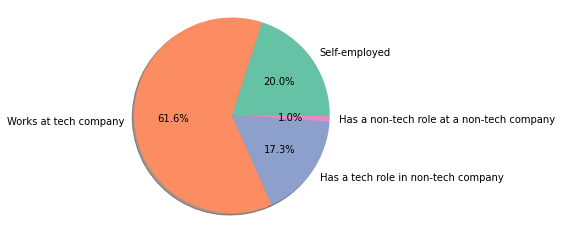

In [18]:
# pie chart of workers
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [df['self_employed'].value_counts()[1],
         df['company_in_tech'].value_counts()[1],
         df['role_in_tech'].value_counts()[1],
         df['role_in_tech'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

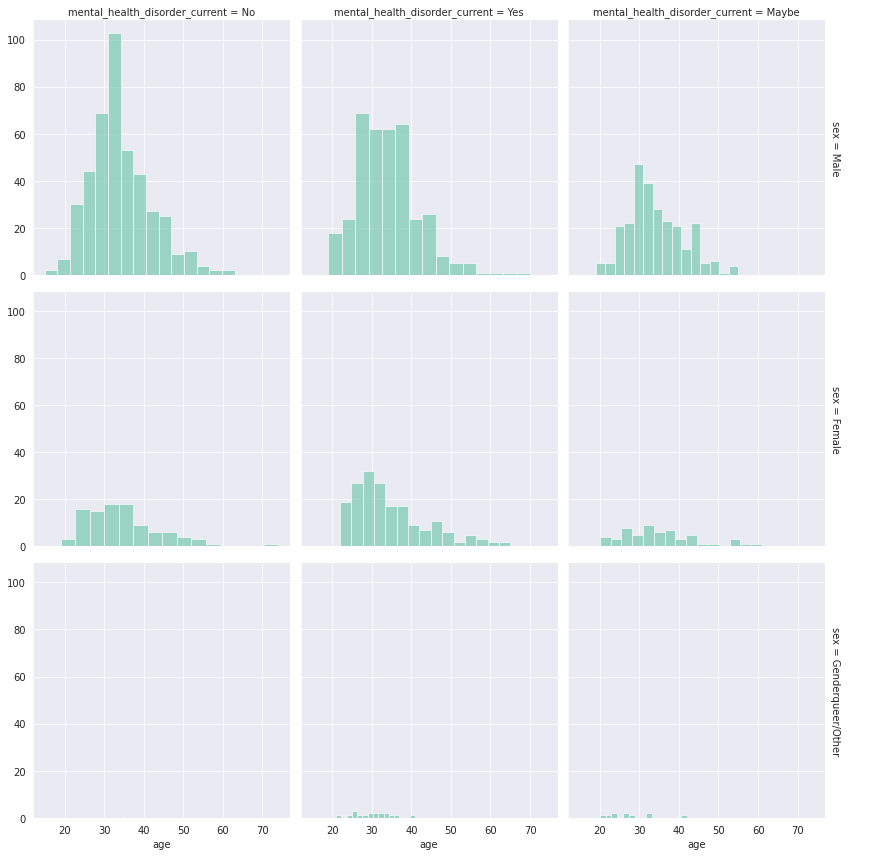

In [19]:
# Distribution of Mental Health Status for All Ages and Genders
sns.set_style("darkgrid")
g = sns.FacetGrid(df, row='sex', col='mental_health_disorder_current', height=4, margin_titles=True)
#plt.grid() 
g.map(plt.hist, 'age', alpha=0.6, bins=15)
g.add_legend()
plt.show()

[]

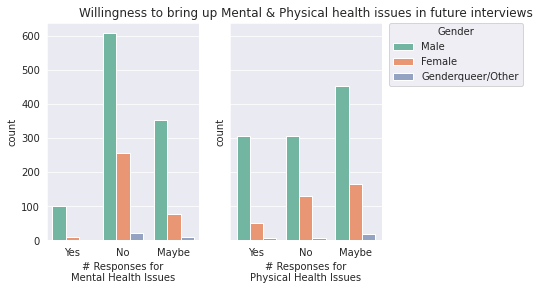

In [20]:
# Willingness to bring up mental & physical health issues in future interview

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
plt.title("Willingness to bring up Mental & Physical health issues in future interviews")
g1 = sns.countplot(x = 'future_company_mental_health_interview', hue = 'sex', data=df, ax=ax1, order=['Yes', 'No', 'Maybe'])
g2 = sns.countplot(x = 'future_company_physical_health_interview', hue = 'sex', data=df, ax=ax2, order=['Yes', 'No', 'Maybe'])
g1.legend_.remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')

g1.set_xlabel('# Responses for\nMental Health Issues')
g2.set_xlabel('# Responses for\nPhysical Health Issues')

plt.plot()

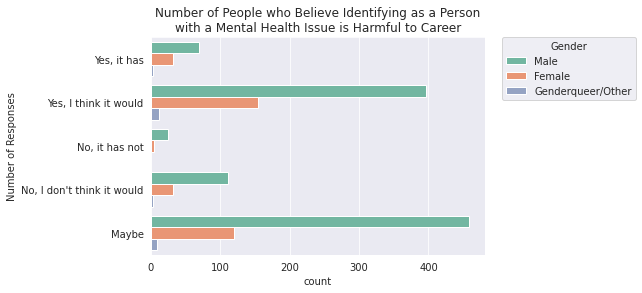

In [21]:
# Mental Health Issue is Harmful to Career

g = sns.countplot(y='mental_health_negative_impact_career',
                 hue='sex', data=df, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
plt.ylabel('Number of Responses')
plt.show()

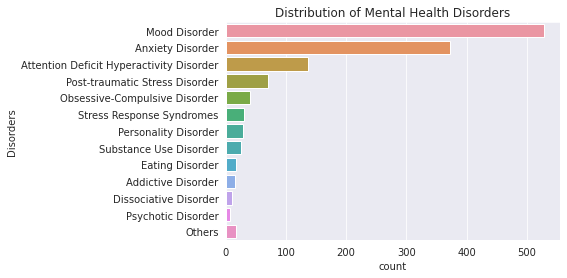

In [22]:
disorders = {}

disorderCounts = dict(df['yes:condition_diagnosed'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])

tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()